# Importando bibliotecas, lendo apenas as colunas necessárias e imprimindo apenas cinco linhas com a função .head()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("/home/mauro/Área de Trabalho/enade/microdados_enade_2014/3.DADOS/MICRODADOS_ENADE_2014.txt", delimiter=';', encoding='iso-8859-1',  usecols=['NU_ANO', 'CO_GRUPO', 'TP_SEXO'])
df.head()

,NU_ANO,CO_GRUPO,TP_SEXO
0,2014,5710,M
1,2014,5710,F
2,2014,5710,F
3,2014,5710,M
4,2014,5710,M


**Distribuição dos alunos por curso no enem em um universo de todos os cursos**

Text(0, 0.5, 'Alunos')

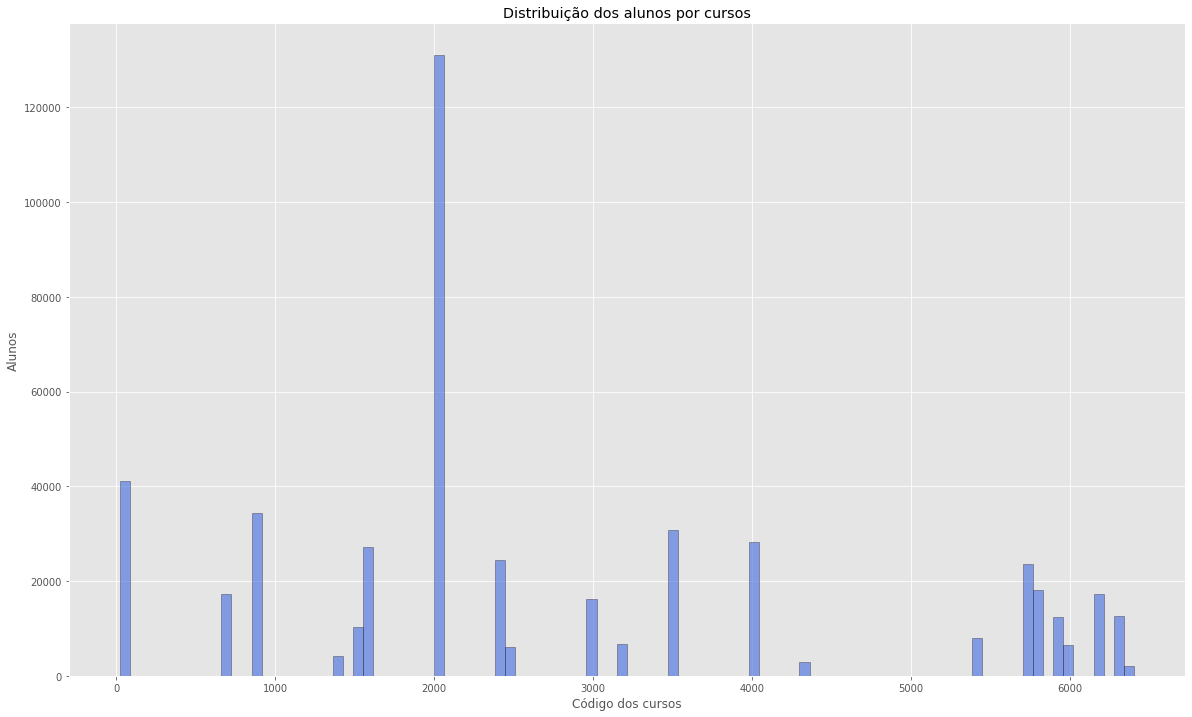

In [2]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
df["CO_GRUPO"].hist(bins = 100, ec = "k", alpha = .6, color = "royalblue")
plt.title("Distribuição dos alunos por cursos")
plt.xlabel("Código dos cursos")
plt.ylabel("Alunos")

**Usando a função loc para selecionar a coluna que contém os dados desejados e a função count para saber a quantidade de alunos nos cursos.**

In [3]:
df = df.loc[(df['CO_GRUPO']==72) | (df['CO_GRUPO']==79) | (df['CO_GRUPO']==4004) | (df['CO_GRUPO']==4005) | (df['CO_GRUPO']==4006) | (df['CO_GRUPO']==5809) | (df['CO_GRUPO']==5811)]
df.count()

NU_ANO      51776
CO_GRUPO    51776
TP_SEXO     51776
dtype: int64

**Usando a função loc para selecionar a coluna que contém os dados desejados e a função assign para criar uma nova coluna de nome curso.**

In [4]:
df = df.loc[(df['CO_GRUPO']==72) | (df['CO_GRUPO']==79) | (df['CO_GRUPO']==4004) | (df['CO_GRUPO']==4005) | (df['CO_GRUPO']==4006) | (df['CO_GRUPO']==4007) | (df['CO_GRUPO']==5809) | (df['CO_GRUPO']==5811)].assign(curso=df.CO_GRUPO) 
df.head()

,NU_ANO,CO_GRUPO,TP_SEXO,curso
595,2014,4004,M,4004
596,2014,4004,M,4004
597,2014,4004,M,4004
598,2014,4004,M,4004
599,2014,4004,M,4004


**Criando a função define_nome para converter o código do curso em nome do curso.**

In [5]:
def define_nome(num):
    if num == 72:
        return 'TECNOLOGIA EM ANALISE E DESENVOLVIMENTO DE SISTEMAS'
    elif num == 79:
        return 'TECNOLOGIA EM REDES DE COMPUTADORES'
    elif num == 4004:
        return 'COMPUTAÇÃO (BACHARELADO)'
    elif num == 4005:
        return 'COMPUTAÇÃO (LICENCIATURA)'
    elif num == 4006:
        return 'COMPUTAÇÃO (SISTEMAS DE INFORMAÇÃO)'
    elif num == 4007:
        return 'COMPUTAÇÃO (BACHARELADO)'
    elif num == 4005:
        return 'COMPUTAÇÃO (ENGENHARIA DE COMPUTAÇÃO)'   
    elif num == 5809:
        return 'ENGENHARIA DA COMPUTAÇÃO'
    elif num == 5811:
        return 'ENGENHARIA DE REDES DE COMUNICAÇÃO' 
    
df['curso'] = df['CO_GRUPO'].map(define_nome)
df.head()

,NU_ANO,CO_GRUPO,TP_SEXO,curso
595,2014,4004,M,COMPUTAÇÃO (BACHARELADO)
596,2014,4004,M,COMPUTAÇÃO (BACHARELADO)
597,2014,4004,M,COMPUTAÇÃO (BACHARELADO)
598,2014,4004,M,COMPUTAÇÃO (BACHARELADO)
599,2014,4004,M,COMPUTAÇÃO (BACHARELADO)


**Imprimindo o número de alunos por curso da área de TI, a legenda dos códigos dos cursos está no rodapé.**

In [6]:
dfTotal = df.loc[(df['CO_GRUPO']==72) | (df['CO_GRUPO']==79) | (df['CO_GRUPO']==4004) | (df['CO_GRUPO']==4005) | (df['CO_GRUPO']==4006) | (df['CO_GRUPO']==5809) | (df['CO_GRUPO']==5811)].assign(curso=df.CO_GRUPO) 
dfTotal['CO_GRUPO'].value_counts()

4006    16288
72      15208
4004     9822
79       5260
5809     2972
4005     2226
Name: CO_GRUPO, dtype: int64

**Contando o número total de alunos por gênero de sexo na área de TI.<br> São 43.933 alunos do sexo masculino, 7.840 do sexo feminino e 3 com gênero não informado.**

In [7]:
dfAlunos = df.loc[(df['CO_GRUPO']==72) | (df['CO_GRUPO']==79) | (df['CO_GRUPO']==4004) | (df['CO_GRUPO']==4005) | (df['CO_GRUPO']==4006) | (df['CO_GRUPO']==4007) | (df['CO_GRUPO']==5809) | (df['CO_GRUPO']==5811) & df['TP_SEXO']==1]
dfAlunos['TP_SEXO'].value_counts()

M    43933
F     7840
N        3
Name: TP_SEXO, dtype: int64

**Gráfico pizza com os gêneros informados, como teve apenas três aluno que preferiram não informar seu gênero sexual não foram incluídos no gráfico pois geraria um percentual muito próximo de zero.**

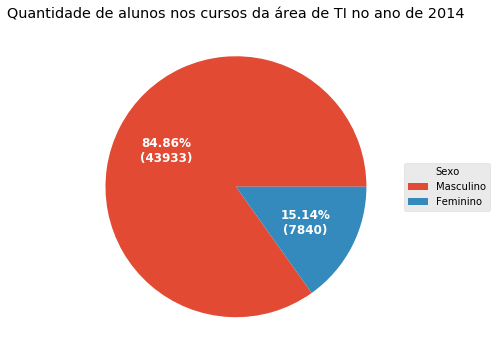

In [8]:
# Aqui criamos a área que plotamos o gráfico e definimos seu tamanho
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect='equal'))
# Criando nosso conjunto de dados
sexo = ['Masculino', 'Feminino']
quant = [43933, 7840] 


# Aqui serão colocados os alunos e as porcentagens no gráfico
def func(pct, allvals):
    # calc %
    absolute = int(round(pct/100.*np.sum(allvals)))
    # fazendo legenda do gráfico com % e Nº de Alunos
    return "{:.2f}%\n({:d})".format(pct, absolute)
    
# Criando o gráfico e colocando a função da legenda interna 
wedges, texts, autotexts = ax.pie(quant, autopct=lambda pct: func(pct, quant),
                                  textprops=dict(color="w"))

# Definindo a caixa de legenda externa, título, localização e onde vai aparecer
ax.legend(wedges, sexo,
          title="Sexo",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    
# Aqui definimos o tamanho do texto de dentro do gráfico, e o peso da fonte como bold
plt.setp(autotexts, size=12, weight="bold")

# Título do gráfico
ax.set_title("Quantidade de alunos nos cursos da área de TI no ano de 2014")

# Mostrando o gráfico
plt.show()

**Gráfico de barras com os gêneros sexauis dos alunos, nesse gráfico foi incluído o alunno que preferiu não informar seu gênero e como esperado gerou um percentual próximo de zero.**

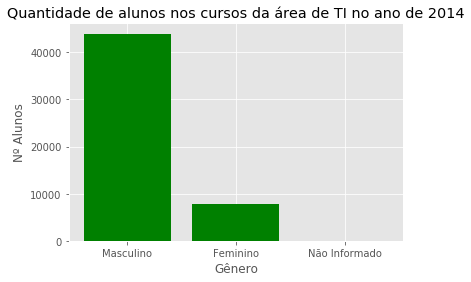

In [9]:
# Um gráfico com a relação Homes x Mulheres no enade
sexo = ['Masculino', 'Feminino', 'Não Informado']
quant = [43933, 7840, 3]

"""
    Chamamos o método bar que criará o gráfico de barra 
    passamos os argumentos que são: 
        - sexo como eixo x 
        - quant como eixo y
        - color para as cores das barras como green ( verde )
"""
plt.bar(sexo, quant, color='green')

# Aqui definimos as legendas de cada barra no eixo X
plt.xticks(sexo)

# A label para o eixo Y
plt.ylabel('Nº Alunos')

# A label para o eixo X
plt.xlabel('Gênero')

# O título do gráfico
plt.title('Quantidade de alunos nos cursos da área de TI no ano de 2014')
 
# Chamamos o método show() para mostrar o gráfico na tela
plt.show()

# Legendas:
### Coluna sexo
**F** : Feminino<br>
**M** : Masculino<br>
**N** : Não Informado
### Coluna Curso

**72 -** TECNOLOGIA EM ANÁLISE E DESENVOLVIMENTO DE SISTEMAS <br>
**79 -** TECNOLOGIA EM REDES DE COMPUTADORES <br>
**4004 -** CIÊNCIA DA COMPUTAÇÃO (BACHARELADO) <br>
**4005 -** CIÊNCIA DA COMPUTAÇÃO (LICENCIATURA) <br>
**4006 -** SISTEMAS DE INFORMAÇÃO <br>
**5809 -** ENGENHARIA DE COMPUTAÇÃO 

## Observação 
#### O enade mudou o formato de seus dados, como mudanças eles trouxeram:
**Formato do arquivo:** Mudou de csv para txt<br>
**Nome das colunas:** Agora as colunas são nomeadas em CAIXA ALTA<br>
**Sexo dos alunos:** Mudou-se do formato numérico (1, 2) para o formato alfabético (M, F, N). Foi incluído a possibilidade de não informar seu gênero sexual.
